In [1]:
#集成学习bagging
from sklearn import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x_data = iris.data[:,:2]
y_data = iris.target

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data)

In [3]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [4]:
def plot_c(model):
    x_min, x_max =x_data[:, 0].min()-1, x_data[:, 0].max()+1
    y_min, y_max =x_data[:, 1].min()-1, x_data[:, 1].max()+1
    #生成网格矩阵
    xx,yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                                np.arange(y_min,y_max,0.02))
    # print(xx.shape)
    # print(xx.ravel().shape)

    z =model.predict(np.c_[xx.ravel(), yy.ravel()])
    # print(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    cs = plt.contourf(xx,yy,z)

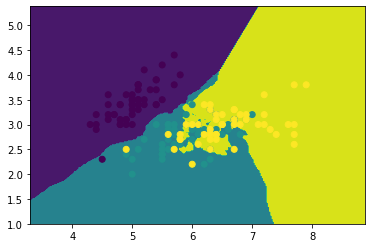

In [5]:

plot_c(knn)
plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()

In [6]:
knn.score(x_test,y_test)

0.7894736842105263

In [7]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

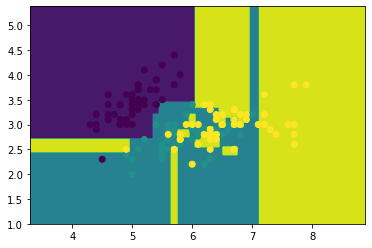

0.7368421052631579

In [8]:
dtree.fit(x_train, y_train)
plot_c(dtree)
plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()
dtree.score(x_test,y_test)

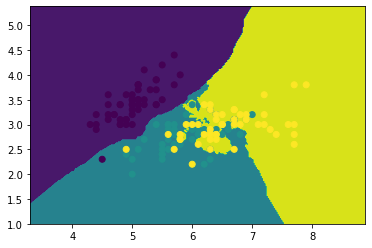

0.8157894736842105

In [9]:
bagging_knn = BaggingClassifier(knn, n_estimators = 100)#100次有放回的抽样
bagging_knn.fit(x_train, y_train)

plot_c(bagging_knn)
plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()
bagging_knn.score(x_test,y_test)

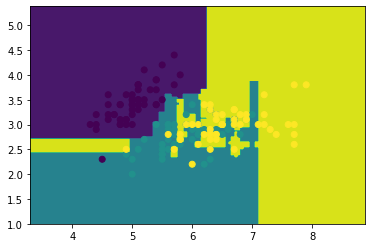

0.7631578947368421

In [10]:
bagging_tree = BaggingClassifier(dtree, n_estimators = 100)#100次有放回的抽样
bagging_tree.fit(x_train, y_train)

plot_c(bagging_tree)
plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()
bagging_tree.score(x_test,y_test)

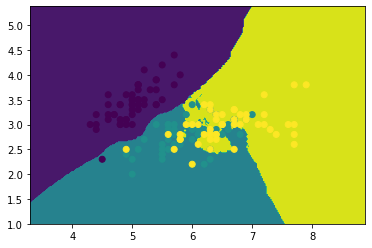

0.8157894736842105

In [11]:
bagging_knn1 = BaggingClassifier(knn, n_estimators = 100)#100次有放回的抽样
bagging_knn1.fit(x_train, y_train)

plot_c(bagging_knn1)
plt.scatter(x_data[:,0],x_data[:,1],c = y_data)
plt.show()
bagging_knn1.score(x_test,y_test)